**Programming Exercise 1**

In [1]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
class KFold:
    
    def __init__(self, k=None):
        self.k = k
        
    def split(self, X_train, shuffle=False):
        
        if self.k is None:
            self.k = X_train.shape[0]
            
        N = X_train.shape[0]
        no_splits = N // self.k
        
        indices = np.arange(N)
        
        if shuffle:
            indices = np.random.permutation(indices)
        
        splits = np.array_split(indices, self.k)
        
        splits_result = list()
        
        for i, test_split_indices in enumerate(splits):
            
            train_split_indices = np.take(splits, [index for index in range(len(splits)) if index != i], axis=0).flatten()
            
            splits_result.append((train_split_indices, test_split_indices))
                       
        return np.array(splits_result, dtype=object)

In [3]:
class LeaveOneOut(KFold):
    
    def __init__(self):
        super().__init__(k=None)

In [4]:
def train_test_split(X, y, train_size, shuffle=True):
    N = X.shape[0]
    split_index = 0
    
    indices = np.arange(N)
    
    if shuffle:
        indices = np.random.permutation(indices)
        
    if isinstance(train_size, int):
        if train_size < 0 or train_size > N - 2:
            raise Exception('Training set size is not valid')
        
        split_index = train_size
    elif isinstance(train_size, float):
        if train_size < 0 or train_size > 1:
            raise Exception('Training set size is not valid')
        
        split_index = int(train_size * N)
    
    X_train = np.take(X, indices[:split_index])
    y_train = np.take(y, indices[:split_index])
    
    X_test = np.take(X, indices[split_index:])
    y_test = np.take(y, indices[split_index:])
    
    return X_train, X_test, y_train, y_test

In [5]:
X_train = np.array([
    [-2],
    [2],
    [1],
    [-1],
    [0],
    [3]
])

y_train = np.array([
    4,
    4,
    1,
    1,
    0,
    9
])

In [43]:
np.random.seed(111)

N = 51
mu = 0.0
sigma = 1.15

X = np.linspace(-4, 4, N).reshape(-1, 1)
y = np.zeros(N).reshape(-1, 1)

epsilon = np.random.normal(mu, sigma, N).reshape(-1, 1)

y = X * X + epsilon

kMax = 20
N_train = 40
K=10

C:\Python310\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
C:\Python310\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
C:\Python310\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is dep

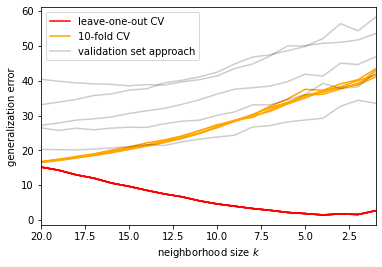

In [44]:
plt.figure()

leave_one_out = LeaveOneOut()

for s in range(5):
    
    results = leave_one_out.split(X)
    res_errors = []
    
    for k in range(1, kMax + 1):

        model1 = KNeighborsRegressor(n_neighbors=k)
        errors = []

        for i in range(results.shape[0]):
            model1.fit(np.take(X, results[i][0]).reshape(-1, 1), np.take(y, results[i][0]).reshape(-1, 1))
            y_prediction = model1.predict(np.take(X, results[i][1]).reshape(-1, 1))

            errors.append(np.power(y_prediction - np.take(y, results[i][1]), 2))
            
        res_errors.append(np.array(errors).mean())
            
        

    if s>0:
        plt.plot(np.linspace(1,kMax,kMax),res_errors,'r', label="_nolegend_")
    else:
        plt.plot(np.linspace(1,kMax,kMax),res_errors,'r', label="leave-one-out CV")
        
        

kfold = KFold(k=K)
        
for s in range(5):

    results = kfold.split(X, shuffle=True)
    res_errors = []
    
    for k in range(1, kMax + 1):

        model2 = KNeighborsRegressor(n_neighbors=k)
        errors = []

        for i in range(results.shape[0]):
            X_train = np.take(X, np.concatenate(results[i][0].tolist()))
            y_train = np.take(y, np.concatenate(results[i][0].tolist()))
            X_test = np.take(X, results[i][1])
            y_test = np.take(y, results[i][1])
            model2.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
            y_prediction = model2.predict(X_test.reshape(-1, 1))

            errors.append(np.power(y_prediction - y_val, 2).mean())
            
        res_errors.append(np.array(errors).mean())
    if s>0:
        plt.plot(np.linspace(1,kMax,kMax),res_errors,color='orange', label="_nolegend_")
    else:
        plt.plot(np.linspace(1,kMax,kMax),res_errors,color='orange', label="10-fold CV")
        
        


for s in range(5):

    X_train, X_test, y_train, y_test = train_test_split(X, y, N_train)
    errors = []

    for k in range(1,kMax+1):
        model3 = KNeighborsRegressor(n_neighbors=k)
        
        model3.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
        y_prediction = model3.predict(X_test.reshape(-1, 1))
        errors.append(np.power(y_prediction - y_test, 2).mean())
       
    if s>0:
        plt.plot(np.linspace(1,kMax,kMax),errors,'k',alpha=0.2,label="_nolegend_")
    else:
        plt.plot(np.linspace(1,kMax,kMax),errors,'k',alpha=0.2,label="validation set approach")
        

plt.legend()
plt.xlim(kMax,1)
plt.xlabel("neighborhood size $k$")
plt.ylabel("generalization error")
plt.show()